# 1. Manipulating word embeddings

you will use a pre-trained word embedding to find analogies and word equivalences. In this notebook, you will apply linear algebra operations using NumPy to manually find analogies between words

In [59]:
import pandas as pd 
import numpy as np 
import pickle 
0
word_embeddings = pickle.load( open( "word_embeddings_subset.p", "rb" ) )
len(word_embeddings['London']) #  243 words

300

In [60]:
word_embeddings

{'country': array([-0.08007812,  0.13378906,  0.14355469,  0.09472656, -0.04736328,
        -0.02355957, -0.00854492, -0.18652344,  0.04589844, -0.08154297,
        -0.03442383, -0.11621094,  0.21777344, -0.10351562, -0.06689453,
         0.15332031, -0.19335938,  0.26367188, -0.13671875, -0.05566406,
         0.07470703, -0.00070953,  0.09375   , -0.14453125,  0.04296875,
        -0.01916504, -0.22558594, -0.12695312, -0.0168457 ,  0.05224609,
         0.0625    , -0.1484375 , -0.01965332,  0.17578125,  0.10644531,
        -0.04760742, -0.10253906, -0.28515625,  0.10351562,  0.20800781,
        -0.07617188, -0.04345703,  0.08642578,  0.08740234,  0.11767578,
         0.20996094, -0.07275391,  0.1640625 , -0.01135254,  0.0025177 ,
         0.05810547, -0.03222656,  0.06884766,  0.046875  ,  0.10107422,
         0.02148438, -0.16210938,  0.07128906, -0.16210938,  0.05981445,
         0.05102539, -0.05566406,  0.06787109, -0.03759766,  0.04345703,
        -0.03173828, -0.03417969, -0.011

Now that the model is loaded, we can take a look at the word representations. First, note that _word_embeddings_ is a dictionary. Each word is the key of the entry and the value is its corresponding vector presentation. Remember that square brackets allow access to any entry if the key exists.

In [61]:
countryVector = word_embeddings['country'] 
print(type(countryVector)) 
print(countryVector) 

<class 'numpy.ndarray'>
[-0.08007812  0.13378906  0.14355469  0.09472656 -0.04736328 -0.02355957
 -0.00854492 -0.18652344  0.04589844 -0.08154297 -0.03442383 -0.11621094
  0.21777344 -0.10351562 -0.06689453  0.15332031 -0.19335938  0.26367188
 -0.13671875 -0.05566406  0.07470703 -0.00070953  0.09375    -0.14453125
  0.04296875 -0.01916504 -0.22558594 -0.12695312 -0.0168457   0.05224609
  0.0625     -0.1484375  -0.01965332  0.17578125  0.10644531 -0.04760742
 -0.10253906 -0.28515625  0.10351562  0.20800781 -0.07617188 -0.04345703
  0.08642578  0.08740234  0.11767578  0.20996094 -0.07275391  0.1640625
 -0.01135254  0.0025177   0.05810547 -0.03222656  0.06884766  0.046875
  0.10107422  0.02148438 -0.16210938  0.07128906 -0.16210938  0.05981445
  0.05102539 -0.05566406  0.06787109 -0.03759766  0.04345703 -0.03173828
 -0.03417969 -0.01116943  0.06201172 -0.08007812 -0.14941406  0.11914062
  0.02575684  0.00302124  0.04711914 -0.17773438  0.04101562  0.05541992
  0.00598145  0.03027344 -0.07

note that we have stored each vector as a Numpy array so that we can use linear algebra operations

vector size is 300, while vocabulary size on google news is 3 million words 

In [62]:
def vec(w):
    return word_embeddings[w]

## Some operations on word embeddings

Remember that understanding data is one of the most critical steps in data science. Word embeddings are the result of machine learning processes and will become part of the input for other processes. These word incorporations must be validated or at least understood because the performance of the derived model will strongly depend on its quality.

Word embeddings are multi-dimensional arrays, usually with hundreds of attributes that pose a challenge for interpretation.

In this notebook, we will visually inspect the word embeddings of certain words using a pair of attributes.

In the next cell, we make plots for the word embeddings of certain words. Although the plotting of the dots gives an idea of the words, the arrow representations also help to visualize the alignment of the vector.

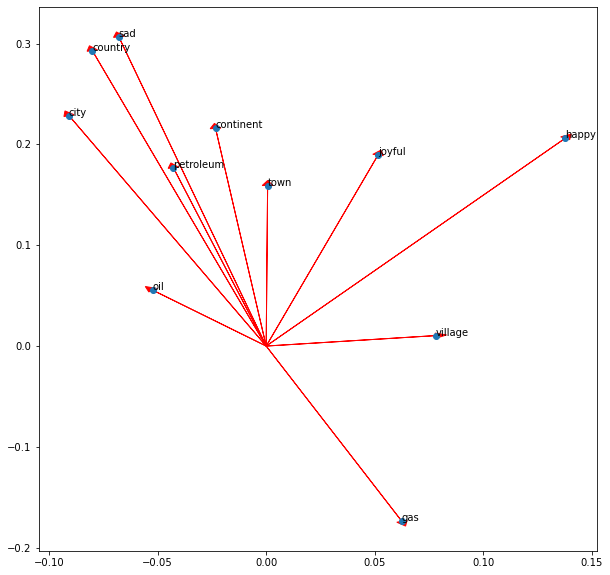

In [63]:
import matplotlib.pyplot as plt 
%matplotlib inline

words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its representation

fig, ax = plt.subplots(figsize = (10, 10)) 

col1 = 69 # columns for the x axis
col2 = 101 # columns for the y axis

# display an arrow for each word 
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
ax.scatter(bag2d[:, col1], bag2d[:, col2]); # one point for each word 

# add label for each word 
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))


plt.show()

Note that similar words like 'village' and 'town' or 'petroleum', 'oil', and 'gas' tend to point in the same direction. Also note that 'sad' and 'happy' seem close to each other; however, the vectors point in opposite directions.

## distance between words


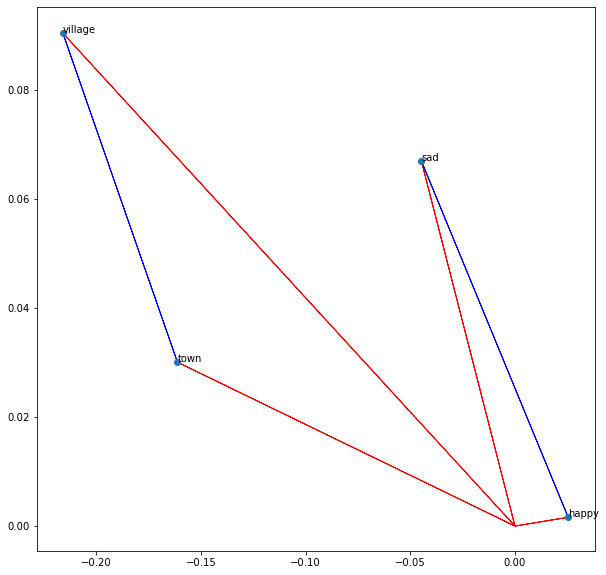

In [64]:
words = ['sad', 'happy', 'town', 'village']

bag2d = np.array([vec(word) for word in words]) 

fig, ax = plt.subplots(figsize = (10, 10)) 

col1 = 3 
col2 = 2 #

# 
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.0005, head_length=0.0005, fc='r', ec='r', width = 1e-5)
    
# vector difference between village and town 
village = vec('village')
town = vec('town')
diff = town - village
ax.arrow(village[col1], village[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)

# vector difference between sad and happy
sad = vec('sad')
happy = vec('happy')
diff = happy - sad
ax.arrow(sad[col1], sad[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)


ax.scatter(bag2d[:, col1], bag2d[:, col2]); # 


for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))


plt.show()


## linear algebra on word embeddings

In the course, we saw the analogies between words using algebra on word embeddings. Let's see how to do it in Python with Numpy.

To start, get the **norm** of a word.

In [65]:
print(np.linalg.norm(vec('town'))) # norm for town
print(np.linalg.norm(vec('sad'))) # norm for sad

2.3858097
2.9004838


## Predict Capitals

Now, by applying vector difference and addition, we can create a vector representation for a new word. For example, the vector difference between “France” and “Paris” can be said to represent the concept of Capital.

we can move from the city of Madrid in the sense of the concept of capital, and obtain something close to the corresponding country (Spain) of which Madrid is the capital.

In [66]:
capital = vec('France') - vec('Paris')
country = vec('Madrid') + capital

print(country[0:5]) 

[-0.02905273 -0.2475586   0.53952026  0.20581055 -0.14862823]


We can observe that the “country” vector we expected to be the same as the vector for Spain is not exactly so.

In [67]:
diff = country - vec('Spain')
print(diff[0:10])

[-0.06054688 -0.06494141  0.37643433  0.08129883 -0.13007355 -0.00952148
 -0.03417969 -0.00708008  0.09790039 -0.01867676]



So we have to look for the closest words in the word embeddings that match the candidate country. If the word embeddings works as expected, the most similar word should be "Spain". Let's define a function that helps us do this. We will store our word embedding as a DataFrame, which will facilitate search operations based on numeric vectors.

In [68]:
# create a dataframe for word embeddings
keys = word_embeddings.keys()
data = []
for key in keys:
    data.append(word_embeddings[key])

embedding = pd.DataFrame(data=data, index=keys)
# Define a function to find the nearest word embeddings 
def find_closest_word(v, k = 1):
    # Calculate the vector difference between each word and the input vector
    diff = embedding.values - v 
 # Get the norm of each difference vector.
     # This means the squared Euclidean distance of each word to the input vector
    delta = np.sum(diff * diff, axis=1)
    # Find the index of the minimum distance in the table
    i = np.argmin(delta)
    # Returns the row name for this element
    return embedding.iloc[i].name


In [69]:

embedding.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
country,-0.080078,0.133789,0.143555,0.094727,-0.047363,-0.023560,-0.008545,-0.186523,0.045898,-0.081543,...,-0.145508,0.067383,-0.244141,-0.077148,0.047607,-0.075195,-0.149414,-0.044189,0.097168,0.067383
city,-0.010071,0.057373,0.183594,-0.040039,-0.029785,-0.079102,0.071777,0.013306,-0.143555,0.011292,...,0.024292,-0.168945,-0.062988,0.117188,-0.020508,0.030273,-0.247070,-0.122559,0.076172,-0.234375
China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,0.034424,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,0.200195,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
oil,-0.139648,0.062256,-0.279297,0.063965,0.044434,-0.154297,-0.184570,-0.498047,0.047363,0.110840,...,-0.195312,-0.345703,0.217773,-0.091797,0.051025,0.061279,0.194336,0.204102,0.235352,-0.051025
town,0.123535,0.159180,0.030029,-0.161133,0.015625,0.111816,0.039795,-0.196289,-0.039307,0.067871,...,-0.007935,-0.091797,-0.265625,0.029297,0.089844,-0.049805,-0.202148,-0.079590,0.068848,-0.164062
Canada,-0.136719,-0.154297,0.269531,0.273438,0.086914,-0.076172,-0.018677,0.006256,0.077637,-0.211914,...,0.105469,0.030762,-0.039307,0.183594,-0.117676,0.191406,0.074219,0.020996,0.285156,-0.257812
London,-0.267578,0.092773,-0.238281,0.115234,-0.006836,0.221680,-0.251953,-0.055420,0.020020,0.149414,...,-0.008667,-0.008484,-0.053223,0.197266,-0.296875,0.064453,0.091797,0.058350,0.022583,-0.101074
England,-0.198242,0.115234,0.062500,-0.058350,0.226562,0.045898,-0.062256,-0.202148,0.080566,0.021606,...,0.135742,0.109375,-0.121582,0.008545,-0.171875,0.086914,0.070312,0.003281,0.069336,0.056152
Australia,0.048828,-0.194336,-0.041504,0.084473,-0.114258,-0.208008,-0.164062,-0.269531,0.079102,0.275391,...,0.021118,0.171875,0.042236,0.221680,-0.239258,-0.106934,0.030884,0.006622,0.051270,-0.135742


Now let's find the name that corresponds to our digital country:

In [70]:
find_closest_word(country)

'Spain'

## Predict other countries

In [71]:
find_closest_word(vec('Italy') - vec('Rome') + vec('Madrid'))

'Spain'

In [72]:
print(find_closest_word(vec('Berlin') + capital))
print(find_closest_word(vec('Beijing') + capital))

Germany
China


However, it doesn't always work that way :)

In [73]:
print(find_closest_word(vec('Lisbon') + capital))

Lisbon


## Represent a sentence as a vector



In [74]:
doc = "Spain petroleum city king"
vdoc = [vec(x) for x in doc.split(" ")]
doc2vec = np.sum(vdoc, axis = 0)
doc2vec

array([ 2.87475586e-02,  1.03759766e-01,  1.32629395e-01,  3.33007812e-01,
       -2.61230469e-02, -5.95703125e-01, -1.25976562e-01, -1.01306152e+00,
       -2.18544006e-01,  6.60705566e-01, -2.58300781e-01, -2.09960938e-02,
       -7.71484375e-02, -3.07128906e-01, -5.94726562e-01,  2.00561523e-01,
       -1.04980469e-02, -1.10748291e-01,  4.82177734e-02,  6.38977051e-01,
        2.36083984e-01, -2.69775391e-01,  3.90625000e-02,  4.16503906e-01,
        2.83416748e-01, -7.25097656e-02, -3.12988281e-01,  1.05712891e-01,
        3.22265625e-02,  2.38403320e-01,  3.88183594e-01, -7.51953125e-02,
       -1.26281738e-01,  6.60644531e-01, -7.89794922e-01, -7.04345703e-02,
       -1.14379883e-01, -4.78515625e-02,  4.76318359e-01,  5.31127930e-01,
        8.10546875e-02, -1.17553711e-01,  1.02050781e+00,  5.59814453e-01,
       -1.17187500e-01,  1.21826172e-01, -5.51574707e-01,  1.44531250e-01,
       -7.66113281e-01,  5.36102295e-01, -2.80029297e-01,  3.85986328e-01,
       -2.39135742e-01, -

In [75]:
find_closest_word(doc2vec)

'petroleum'

# Word Embeddings using Gensim NLTK and beatiful Soup librairies 

On your terminal, install gensim: 

*pip install --upgrade gensim

Or, alternatively for Conda environments

*conda install -c conda-forge gensim

In [76]:
import gensim

### then install beatiful soup for scraping as well as lxml for html and xml parsing
pip install beautifulsoup4

pip install lxml

In [77]:
import bs4 as bs
import urllib.request
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
article = scrapped_data .read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

In the script above, we first download the Wikipedia article using the urlopen method of the request class of the urllib library. We then read the content of the article and analyze it using an object of the BeautifulSoup class. Wikipedia stores the textual content of the article in p tags. We use the find_all function of the BeautifulSoup object to retrieve all the paragraph tag content from the article.

Finally, we join all the paragraphs together and store the retrieved article in the article_text variable for later use.

## pre-processing

At this point, we have now imported the article. The next step is to preprocess the content of the Word2Vec template. The following script preprocesses the text:

In [79]:
# Cleaing the text
processed_article = article_text.lower()
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )
processed_article = re.sub(r'\s+', ' ', processed_article)

# Preparing the dataset
all_sentences = nltk.sent_tokenize(processed_article)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

# Removing Stop Words

for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [80]:
!pip install word2vec 

^C


In [83]:
from gensim.models import Word2Vec

word2vec=Word2Vec(all_words, window=5, min_count=1, workers=4,sg=1) # sg=1 for skipgram 0 for CBOW

To see the dictionary of unique words that exist at least twice in the corpus, run the following script:

In [84]:
vocabulary = word2vec.wv.vocab
print(vocabulary)

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [85]:
v1 = word2vec.wv['artificial']#word embedding for artificial

In [86]:
v1

array([-0.02059118,  0.02317267,  0.00439464, -0.00014823,  0.01237648,
       -0.0377856 ,  0.00664518,  0.06119857, -0.03060376, -0.00382578,
       -0.02165063, -0.04031125,  0.01456979,  0.01096069,  0.01590176,
       -0.0306572 ,  0.01606589, -0.02810172, -0.01815302, -0.05564166,
        0.01419744, -0.00324673,  0.01162719, -0.01188962, -0.00447956,
       -0.0016777 , -0.01508269, -0.0125073 , -0.02657894,  0.01292929,
        0.04074974,  0.00878062,  0.01379149, -0.01849828, -0.01611321,
        0.02857681, -0.00299515, -0.02568365, -0.01383993, -0.05058827,
       -0.00637164, -0.02770728, -0.01632017,  0.01080225,  0.02728176,
       -0.01778121, -0.02544272,  0.0053463 ,  0.01701042,  0.02177477,
        0.0088815 , -0.02182054, -0.0165565 , -0.01149846, -0.02740057,
        0.00383274,  0.01332637, -0.01611214, -0.03112535,  0.00661553,
        0.01096644,  0.00410039,  0.00340251, -0.00279721, -0.04729772,
        0.03022425,  0.00524311,  0.02188151, -0.05040479,  0.04

In [87]:
sim_words = word2vec.wv.most_similar('intelligence')#motes most similar to artificial
print(sim_words)

[('ai', 0.9637293219566345), ('machines', 0.9457339644432068), ('artificial', 0.9432176351547241), ('may', 0.9403892755508423), ('mind', 0.9401260018348694), ('learning', 0.9394936561584473), ('use', 0.9375277161598206), ('machine', 0.9371527433395386), ('human', 0.936083197593689), ('used', 0.9357478618621826)]


> change the value of the sg parameter to 0 and try to rexecute the cells below, is there any change ?  
